

# Machine Learning Midterm Project: Banknote Authentication Analysis
**Author:** AARON 
**Date:** November, 8, 2025 
**Objective:** Setup two model types, Neural Network and Decision Tree and use these to predict authenticity of bank notes from the UCI Banknote Authentication Dataset.



## Introduction
This project uses the UCI Banknote Authentication Dataset to Explore and Clean data, choose a feature to predict, and split the dataset into train and test subsets.
Setup two model types, Neural Network and Decision Tree and use these to predict authenticity of bank notes from the UCI Banknote Authentication Dataset.  


## Section 1. Import and Inspect the Data
 

### 1.1 Include Imports

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

### 1.2 Load the dataset and display basic information

In [7]:


# Load UCI Banknote Authentication Dataset

file_path = r"C:\Repos\applied-ml-hrawp\data\data_banknote_authentication.txt"

real_money = pd.read_csv(file_path, header=None)
real_money.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Display a few records to verify
real_money.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### 1.3 Check for missing values and display summary statistics

In [8]:
# Check for missing values using the isnull() method and then the sum() method. 
real_money.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [9]:
# Display summary statistics using the describe() method

print(real_money.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [10]:
# Check for correlations using the corr() method and tell it to use only the numeric features. 

print(real_money.corr(numeric_only=True))

          variance  skewness  curtosis   entropy     class
variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
class    -0.724843 -0.444688  0.155883 -0.023424  1.000000


### Reflection 1:
1) How many data instances are there? 1372
2) How many features are there? 4
3) What are the names?  variance     skewness     curtosis      entropy            
4) Are there any missing values? No
5) Are there any non-numeric features? Yes.  All four features are numeric.
6) Are the data instances sorted on any of the attributes?  There is no a sort on any attribute.
7) What two different features have the highest correlation? skewness and entropy against variance
8) Are there any categorical features that might be useful for prediction?  Perhaps entropy and curtosis would be a good place to start.

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

array([[<Axes: xlabel='variance', ylabel='variance'>,
        <Axes: xlabel='skewness', ylabel='variance'>,
        <Axes: xlabel='curtosis', ylabel='variance'>,
        <Axes: xlabel='entropy', ylabel='variance'>,
        <Axes: xlabel='class', ylabel='variance'>],
       [<Axes: xlabel='variance', ylabel='skewness'>,
        <Axes: xlabel='skewness', ylabel='skewness'>,
        <Axes: xlabel='curtosis', ylabel='skewness'>,
        <Axes: xlabel='entropy', ylabel='skewness'>,
        <Axes: xlabel='class', ylabel='skewness'>],
       [<Axes: xlabel='variance', ylabel='curtosis'>,
        <Axes: xlabel='skewness', ylabel='curtosis'>,
        <Axes: xlabel='curtosis', ylabel='curtosis'>,
        <Axes: xlabel='entropy', ylabel='curtosis'>,
        <Axes: xlabel='class', ylabel='curtosis'>],
       [<Axes: xlabel='variance', ylabel='entropy'>,
        <Axes: xlabel='skewness', ylabel='entropy'>,
        <Axes: xlabel='curtosis', ylabel='entropy'>,
        <Axes: xlabel='entropy', ylabel=

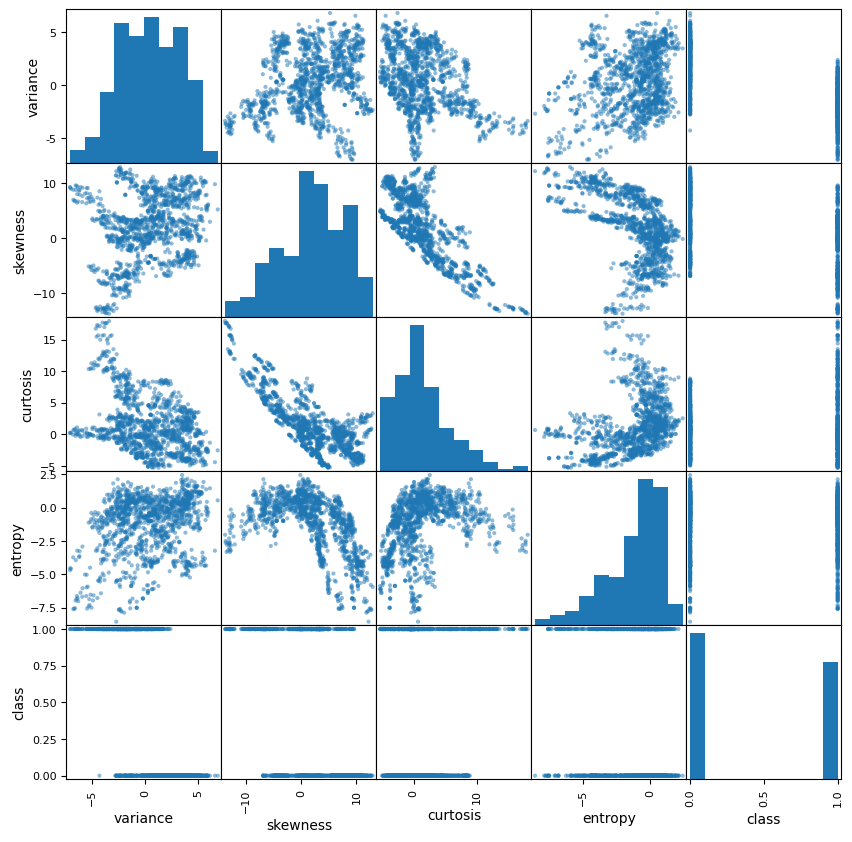

In [ ]:
# Create a scatter matrix of 'variance', 'skewness', 'curtosis', 'entropy', 'class':

scatter_matrix(real_money[real_money.columns], figsize=(10, 10))

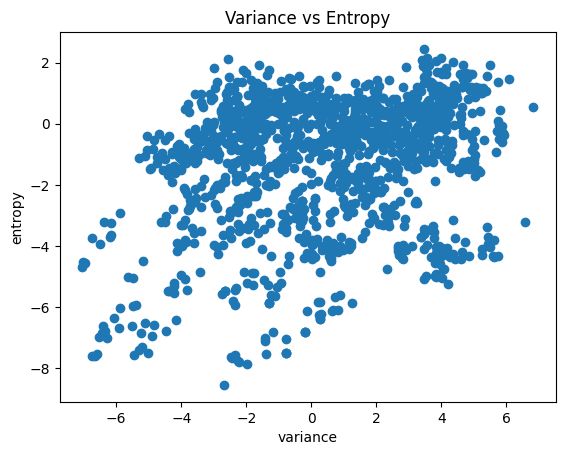

In [ ]:
# Create a scatter plot of variance vs entropy:

plt.scatter(real_money['variance'], real_money['entropy'])
plt.xlabel('variance')
plt.ylabel('entropy')
plt.title('Variance vs Entropy')
plt.show()

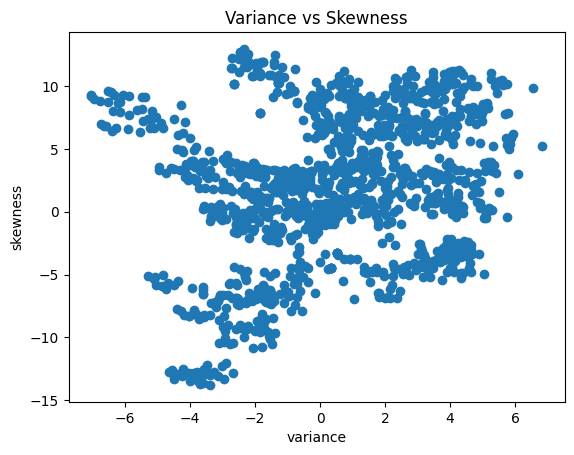

In [ ]:
# Create a scatter plot of variance vs skewness:

plt.scatter(real_money['variance'], real_money['skewness'])
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('Variance vs Skewness')
plt.show()

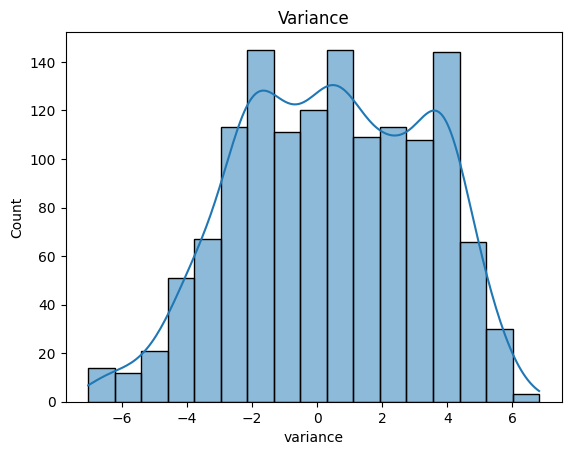

In [ ]:
# Create a histogram of variance:

sns.histplot(real_money['variance'], kde=True)
plt.title('Variance')
plt.show()

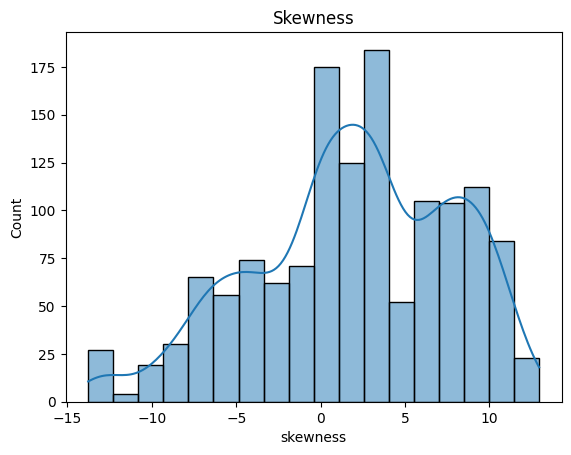

In [21]:
# Create a histogram of skewness:

sns.histplot(real_money['skewness'], kde=True)
plt.title('Skewness')
plt.show()

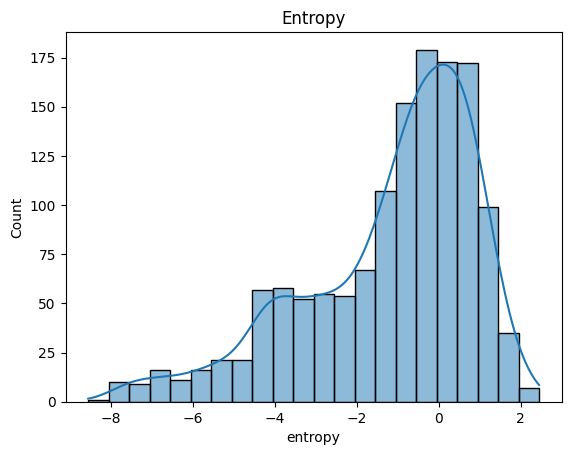

In [ ]:
# Create a histogram of entropy:

sns.histplot(real_money['entropy'], kde=True)
plt.title('Entropy')
plt.show()

### 2.2 Feature Engineering

In [24]:
# Create a new feature: Skewness and Variance
real_money['skew_var'] = real_money['skewness'] * real_money['variance']


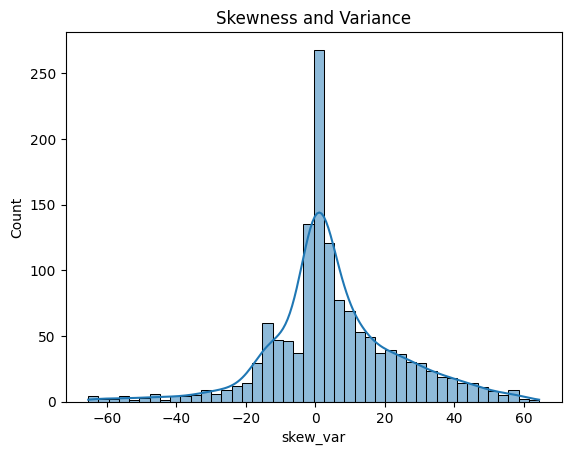

In [25]:
# Create a histogram of skew_var:

sns.histplot(real_money['skew_var'], kde=True)
plt.title('Skewness and Variance')
plt.show()

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target



Case 1: 
input features: 'Curtosis' and 'Variance'
target: class

Case 2:
input features - 'Skewness' and 'Variance'
target: class

Case 3:
input features -  'Curtosis' and 'Skewness and Variance'
target: class


### 3.2 Define X and y

Assign input features to X a pandas DataFrame with 1 or more input features
Assign target variable to y (as applicable) - a pandas Series with a single target feature

In [ ]:
# Case 1: Features = Curtosis, Variance
# Select the features 'curtosis', 'variance' as input
X1 = real_money[['curtosis', 'variance']]
# Select 'survived' as the target for the same rows
y1 = real_money['class']
 

# Case 2: Features = Skewness, Variance
# Select the features 'skewness', 'variance', but drop rows where age is missing
X2 = real_money[['skewness', 'variance']].dropna()
# Select the matching 'survived' values using the same index
y2 = real_money.loc[X2.index, 'class']
 

# Case 3: Features = Curtosis, 'skew_var' (Skewness and Variance combined)
# Select both curtosis', 'skew_var', and drop rows where missing (na)
X3 = real_money[['curtosis', 'skew_var']].dropna()
# Select the corresponding 'survived' values for those rows
y3 = real_money.loc[X3.index, 'class']

### Reflection 3:

Why are these features selected?  These were selected based on reviewing the overview of the data in the scatter matrix.  I saw that when skewness and variance are high in value there is a tendency for genuine notes.  I also saw a lower curtosis value the tendency it towards genuine notes.  So I want to focus on these.  I choose for case 3 a feature engineered variable where I multiply the effects of the skewness and varience to heighten the positive values weight on the parameters.  I think that will help the model out even more.

## Section 4. Train a Classification Model (Decision Tree)
 

Split the data into training and test sets.

### 4.1 Split the Data

In [30]:
# Case 1: Features = Curtosis, Variance
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Curtosis + Variance:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))


Case 1 - Curtosis + Variance:
Train size: 1097 | Test size: 275


In [31]:
# Case 2: Features = Skewness, Variance
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Skewness + Variance:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

Case 2 - Skewness + Variance:
Train size: 1097 | Test size: 275


In [32]:
# Case 3: Features = Curtosis, 'skew_var' (Skewness and Variance combined)
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - Curtosis + skew_var:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))

Case 3 - Curtosis + skew_var:
Train size: 1097 | Test size: 275


### 4.2 Create and Train Model (Decision Tree)
Create and train all 3 cases.

In [33]:
# CASE 1: Decision Tree using Curtosis, Variance
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
# CASE 2: Decision Tree using Skewness, Variance
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
# CASE 3: Decision Tree using Curtosis, 'skew_var'
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance

In [36]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - Curtosis, Variance):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - Curtosis, Variance):")
print(classification_report(y1_test, y1_test_pred))



Results for Decision Tree on training data (Case 1 - Curtosis, Variance):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       488

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097

Results for Decision Tree on test data (Case 1 - Curtosis, Variance):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       153
           1       0.93      0.86      0.89       122

    accuracy                           0.91       275
   macro avg       0.91      0.90      0.91       275
weighted avg       0.91      0.91      0.91       275



In [37]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - Skewness, Variance):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - Skewness, Variance):")
print(classification_report(y2_test, y2_test_pred))



Results for Decision Tree on training data (Case 2 - Skewness, Variance):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       488

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097

Results for Decision Tree on test data (Case 2 - Skewness, Variance):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       153
           1       0.95      0.90      0.92       122

    accuracy                           0.93       275
   macro avg       0.94      0.93      0.93       275
weighted avg       0.94      0.93      0.93       275



In [38]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - Curtosis, 'skew_var'):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - Curtosis, 'skew_var'):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - Curtosis, 'skew_var'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       488

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097

Results for Decision Tree on test data (Case 3 - Curtosis, 'skew_var'):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       153
           1       0.91      0.89      0.90       122

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275



### 4.4 Report Confusion Matrix (as a heatmap)

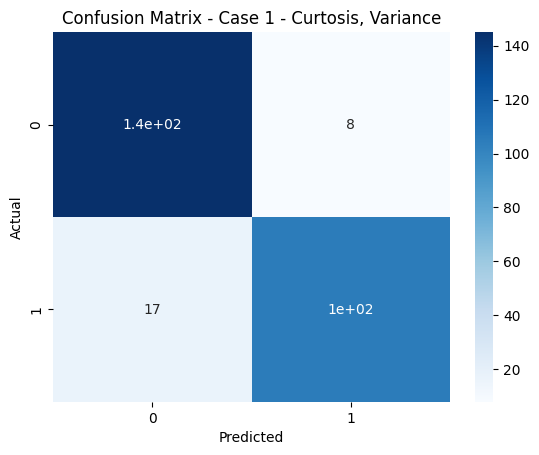

In [42]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1 - Curtosis, Variance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


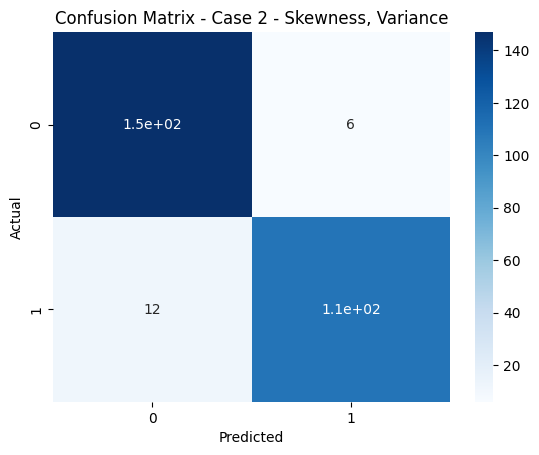

In [43]:


# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2 - Skewness, Variance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


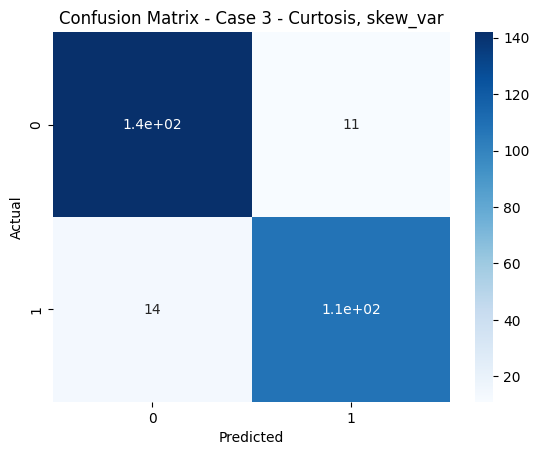

In [44]:

# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3 - Curtosis, skew_var')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot



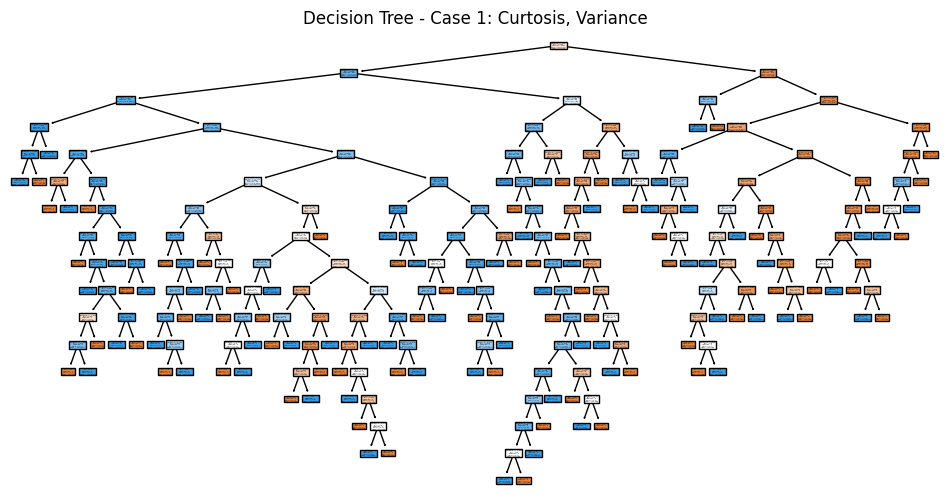

In [55]:
# Case 1

# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Genuine', 'Counterfeit'],
          filled=True)
plt.title("Decision Tree - Case 1: Curtosis, Variance")
plt.show()

# Save image
fig.savefig("tree_case1_midterm.png")


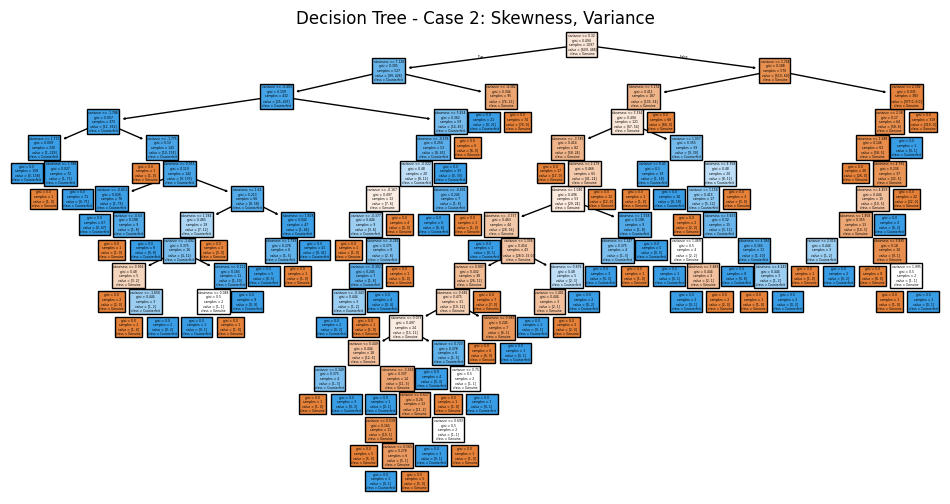

In [56]:


# Case 2

# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Genuine', 'Counterfeit'],
          filled=True)
plt.title("Decision Tree - Case 2: Skewness, Variance")
plt.show()

# Save image
fig.savefig("tree_case2_midterm.png")


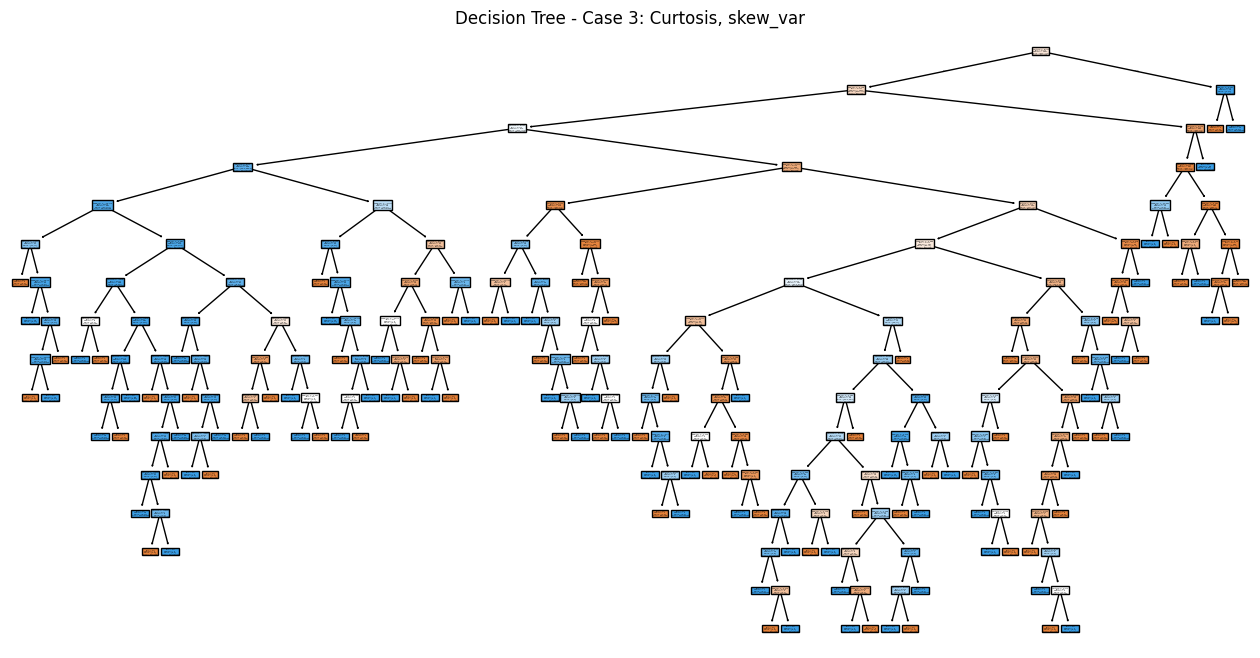

In [57]:

# Case 3

# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Genuine', 'Counterfeit'],
          filled=True)
plt.title("Decision Tree - Case 3: Curtosis, skew_var")
plt.show()

# Save image
fig.savefig("tree_case3_midterm.png")

Decision Tree Data

| Model Type    | Case   | Features Used     | Accuracy | Precision | Recall | F1-Score  | Notes |
|---------------|--------|-------------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | Curtosis, Variance | 91%      | 91%       | 90%    | 91%       | -     |
|               | Case 2 | Skewness, Variance | 93%      | 94%       | 93%    | 93%       | -     |
|               | Case 3 | Curtosis, skew_var | 91%      | 91%       | 91%    | 91%       | -     |



### Reflection 4:
- How well did the different cases perform?  I was happy to see all of the parameters at or above 90%.
- Are there any surprising results?  I was surprised that all the training values were 100%.  I'm not sure why that is.
I was surprised to see that the engineered feature did not give a higher accuracy.  It tied for second of the three.
- Which inputs worked better? I think Skewness along with Variance is a key parameter since Case 2 outperformed.  I am excited to see how these cases with turn out in a Neural Network model.

## Section 5. Compare Alternative Models (SVC, NN)



In [73]:
# RBF Kernel (default) - same as calling SVC()
# svc_model = SVC(kernel='rbf')
# svc_model.fit(X_train, y_train)

In [74]:
# Linear Kernel
# svc_model = SVC(kernel='linear')
# svc_model.fit(X_train, y_train)

In [75]:
# Polynomial Kernel (e.g., with degree=3)
# svc_model = SVC(kernel='poly', degree=3)
# svc_model.fit(X_train, y_train)

In [76]:
# Sigmoid Kernel
# svc_model = SVC(kernel='sigmoid')
# svc_model.fit(X_train, y_train)

### 5.1 Train and Evaluate Model (SVC)

In [77]:
# Case 1

# CASE 1: SVC using 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [78]:
# Case 2

# CASE 2: SVC using 'age'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("Results for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))

Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [79]:
# Case 3

# CASE 3: SVC using 'age and family size'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("Results for SVC on test data (Case 3 - age and family size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3 - age and family size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.2 Visualize Support Vectors (1D Case 1 and 2D Case 3)

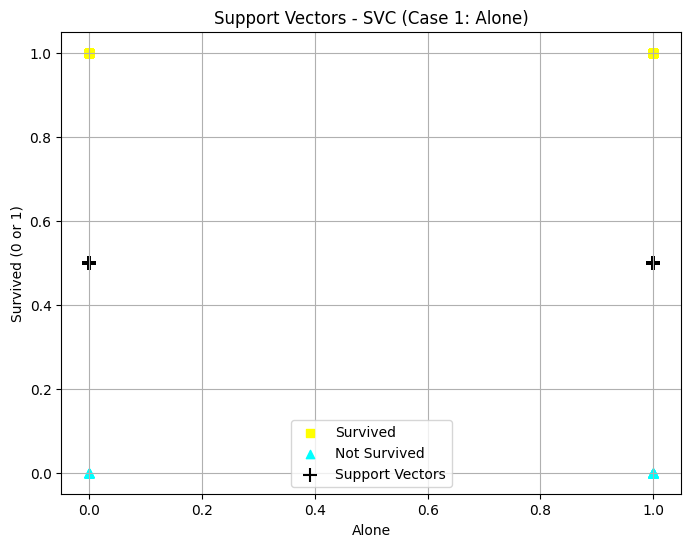

In [80]:

# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()

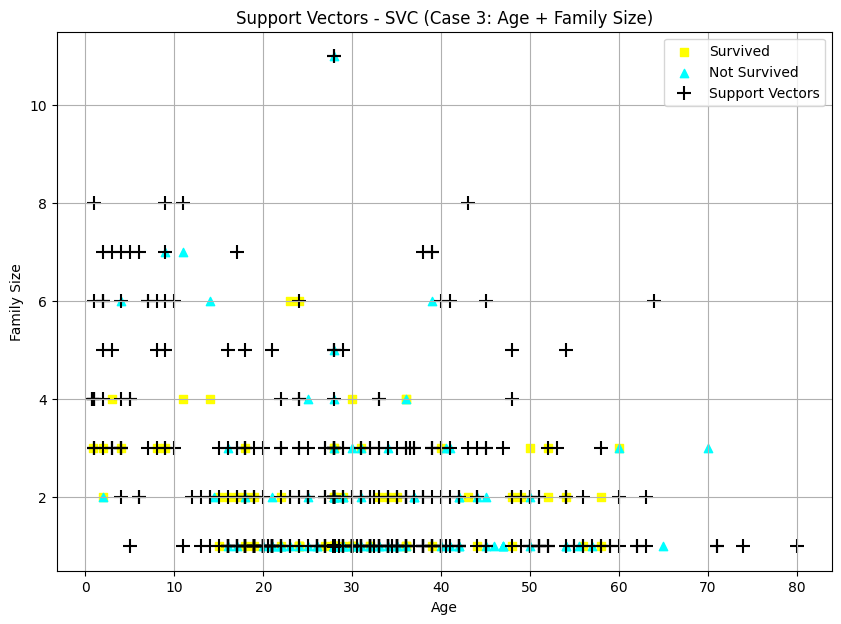

In [81]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived['age'], survived['family_size'],
            c='yellow', marker='s', label='Survived')

# Plot not survived (cyan triangles)
plt.scatter(not_survived['age'], not_survived['family_size'],
            c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
if hasattr(svc_model3, 'support_vectors_'):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c='black', marker='+', s=100, label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()

### 5.3 Train and Evaluate Model (Neural Network on Case 3)

In [82]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [83]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       110
           1       0.60      0.41      0.48        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.62       179
weighted avg       0.65      0.66      0.65       179



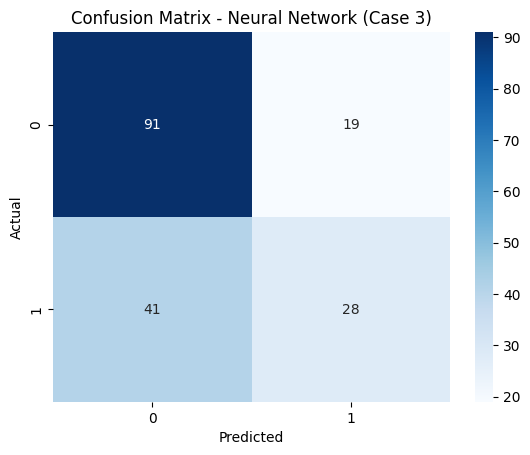

In [84]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.4 Visualize (Neural Network on Case 3)

In [85]:
# Get the range of our two features - use padding to enhance appearance

padding = 1
x_min, x_max = X3['age'].min() - padding, X3['age'].max() + padding
y_min, y_max = X3['family_size'].min() - padding, X3['family_size'].max() + padding

In [86]:
# Create a meshgrid (all combinations of age and family_size)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))

In [87]:
# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

c:\Repos\applied-ml-hrawp\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


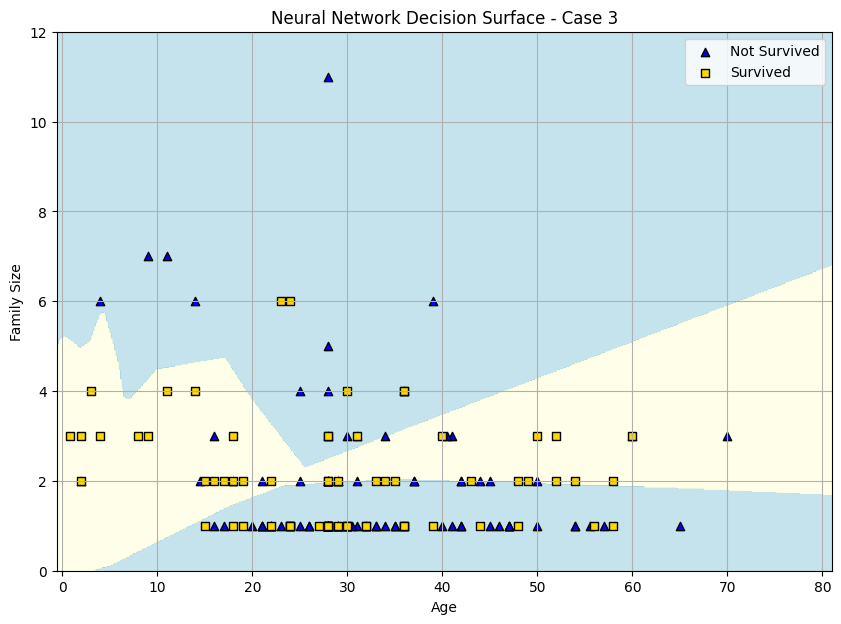

In [88]:
# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)# Overlay the actual test data points for visual comparison


# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X3_test['age'][y3_test == 0],
            X3_test['family_size'][y3_test == 0],
            c='blue', marker='^', edgecolor='k', label='Not Survived')

# Plot passengers who DID survive (1) as gold squares
plt.scatter(X3_test['age'][y3_test == 1],
            X3_test['family_size'][y3_test == 1],
            c='gold', marker='s', edgecolor='k', label='Survived')

# Add axis labels, title, legend, and grid
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Neural Network Decision Surface - Case 3')
plt.legend()
plt.grid(True)
plt.show()

### Reflection 5:
How well did each of these new models/cases perform?  'The 'alone' case again performed the best in the SVM model type.  But the distinction between the three SVM cases narrowed as compared to the Decision Tree.  The Neural Network outperformed every other model.
Are there any surprising results or insights?  I am surprised case 3 was so much better than the same case in the Decision Tree.
Why might one model outperform the others?  I think the Neural Network performed better since it had two variables to work with and had feedback from both into each node.


| Model Type           | Case   | Features Used     | Accuracy | Precision | Recall | F1-Score  | Notes |
|----------------------|--------|-------------------|----------|-----------|--------|-----------|-------|
| Decision Tree        | Case 1 | alone             | 63%      | 64%       | 63%    | 63%       | -     |
|                      | Case 2 | age               | 61%      | 58%       | 61%    | 55%       | -     |
|                      | Case 3 | age + family_size | 59%      | 57%       | 59%    | 58%       | -     |
|----------------------|--------|-------------------|----------|-----------|--------|-----------|-------|
| SVM (RBF Kernel)     | Case 1 | alone             | 63%      | 64%       | 63%    | 63%       | -     |
|                      | Case 2 | age               | 63%      | 66%       | 63%    | 52%       | -     |
|                      | Case 3 | age + family_size | 63%      | 66%       | 63%    | 52%       | -     |
|----------------------|--------|-------------------|----------|-----------|--------|-----------|-------|
| Neural Network (MLP) | Case 1 | alone             | ---      | ----      | ---    | --        | -     |
|                      | Case 2 | age               | ---      | ----      | ---    | --        | -     |
|                      | Case 3 | age + family_size | 66%      | 65%       | 66%    | 65%       | -     |


## Section 6. Final Thoughts & Insights

At first I was a little discouraged at the accuracy of the models and other parameters.  It seemed like just knowing if a passenger was alone or not told most of the tale.  But when I worked with the Neural Network I saw noticeable improvement in the results.  I was glad to see that.  These differences can be seen in the table below.
I look forward to using Neural Networks in the future for classification models.